In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import numpy as np

In [2]:
df  = pd.read_csv("data/HESS_Dataset.csv")
df.head()

,Timestamp,Solar_Power_kW,Wind_Power_kW,Grid_Power_kW,Battery_SoC_%,SC_Charge_kW,Hydrogen_Production_kg/h,Load_Demand_kW,Power_Supplied_kW,Power_Loss_kW,Optimization_Level
0,2024-04-01 00:00:00,18.727006,7.405317,8.925585,73.816240,5.719959,1.968178,62.412848,62.218850,0.193997,High Efficiency
1,2024-04-01 01:00:00,47.535715,21.676038,8.704682,83.734512,8.054323,2.367178,38.619318,37.685455,0.933863,High Efficiency
2,2024-04-01 02:00:00,36.599697,34.917833,18.593819,40.037432,7.601609,4.272737,73.619728,69.463499,4.156229,Moderate Efficiency
3,2024-04-01 03:00:00,29.932924,29.288995,8.743193,69.989928,1.538999,1.700022,60.655812,56.821970,3.833842,Moderate Efficiency
4,2024-04-01 04:00:00,7.800932,32.262446,9.079246,65.739679,1.492495,4.348248,37.860194,36.106981,1.753213,High Efficiency


In [ ]:
#https://www.kaggle.com/datasets/ziya07/hybrid-energy-storage-dataset

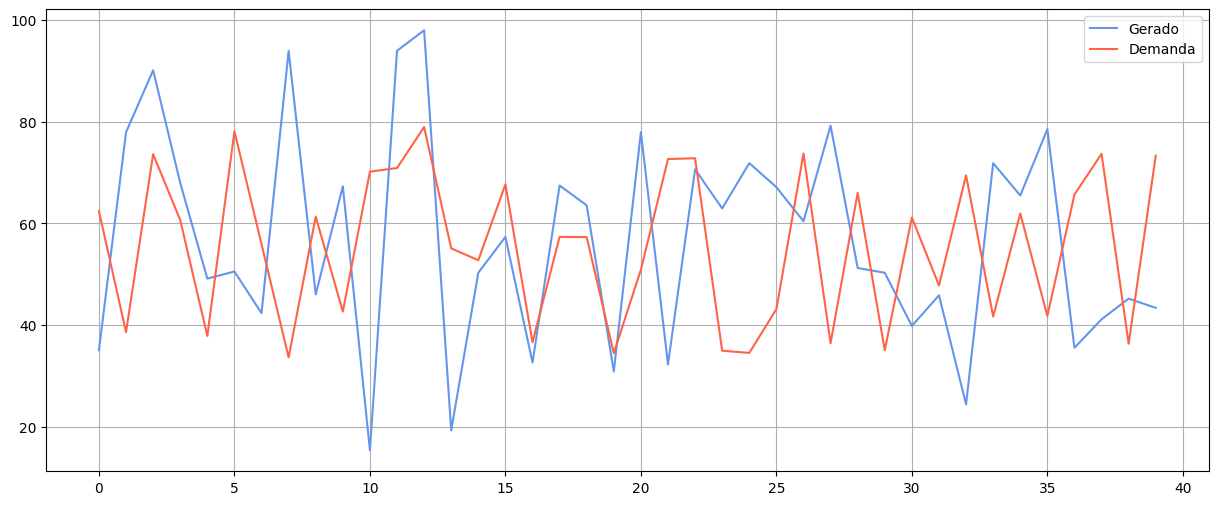

In [21]:
generated = df["Solar_Power_kW"]+df["Grid_Power_kW"]+df["Wind_Power_kW"]
demand = df["Load_Demand_kW"]

plt.figure(figsize=(15,6))
plt.plot(generated[0:40],label="Gerado",color="cornflowerblue")
plt.plot(demand[0:40],label="Demanda",color="tomato")
plt.legend()
plt.grid()

In [40]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

def estimate_arima(series, order=(1, 1, 1)):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)

    model = ARIMA(series, order=order)
    fitted_model = model.fit()

    estimated_series = fitted_model.fittedvalues
    return estimated_series


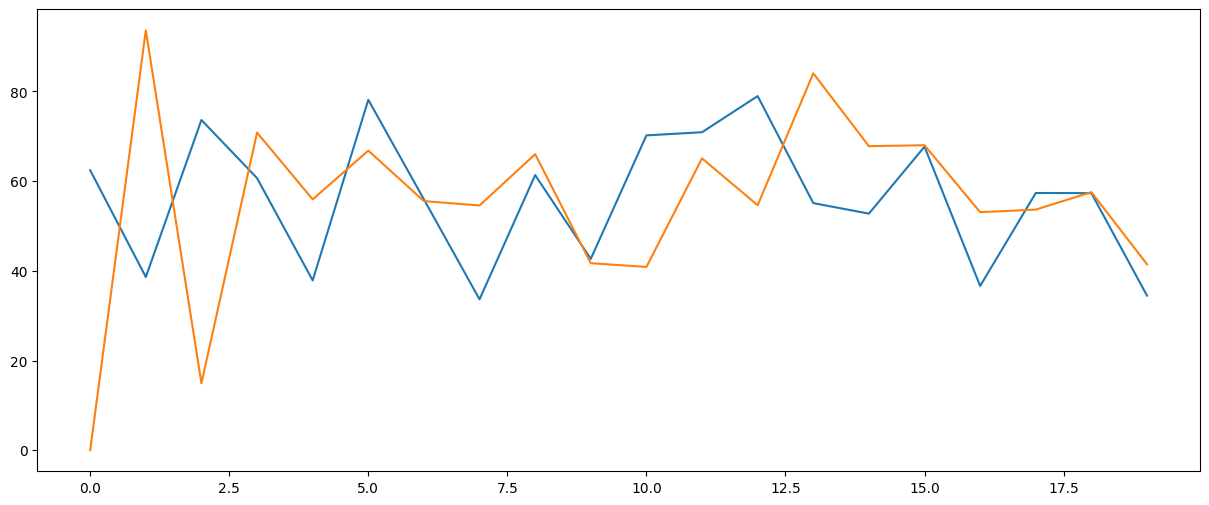

In [80]:
estimated_demand = estimate_arima(demand[0:20], order=(2, 2, 2))
estimated_generated = estimate_arima(generated[0:20], order=(3, 1, 1))

plt.figure(figsize=(15,6))
plt.plot(demand[0:20])
plt.plot(estimated_demand[0:20])

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def plot_generation_vs_demand(estimated_generated, estimated_demand):
    estimated_generated = np.array(estimated_generated)
    estimated_demand = np.array(estimated_demand)

    insufficient = estimated_demand > estimated_generated

    
    plt.figure(figsize=(15,6))
    plt.plot(estimated_generated, label="Estimated Generation")
    plt.plot(estimated_demand, label="Estimated Demand")

    x_insufficient = np.where(insufficient)[0]
    y_insufficient = estimated_demand[insufficient]

    plt.scatter(
        x_insufficient,
        y_insufficient,
        marker="x",
        label="Insufficient Generation"
    )

    for x, y in zip(x_insufficient, y_insufficient):
        plt.annotate(
            "Insufficient generation",
            (x, y),
            textcoords="offset points",
            xytext=(5, 5),
            fontsize=8
        )

    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.show()


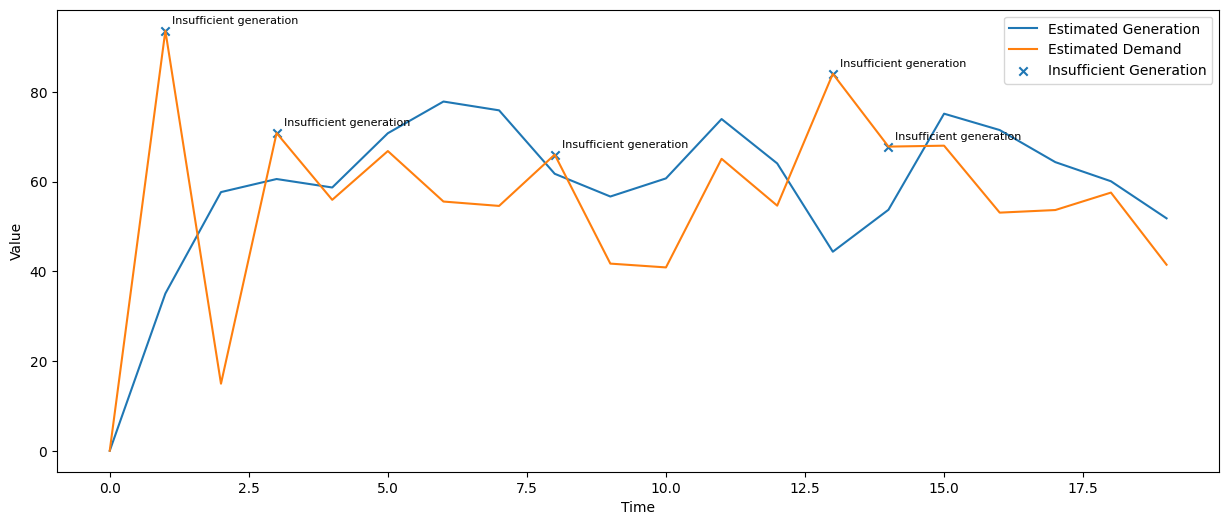

In [84]:
plot_generation_vs_demand(estimated_generated, estimated_demand)